In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r"E:\Python\New folder\titanic-training-data.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## EDA

<AxesSubplot:xlabel='Survived', ylabel='count'>

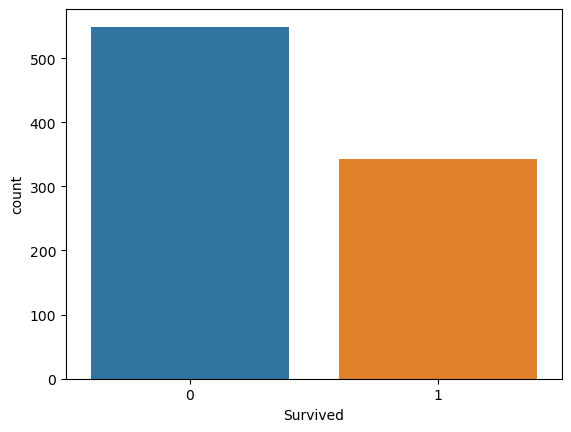

In [8]:
### Analyze dependent variable
sns.countplot(x="Survived",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

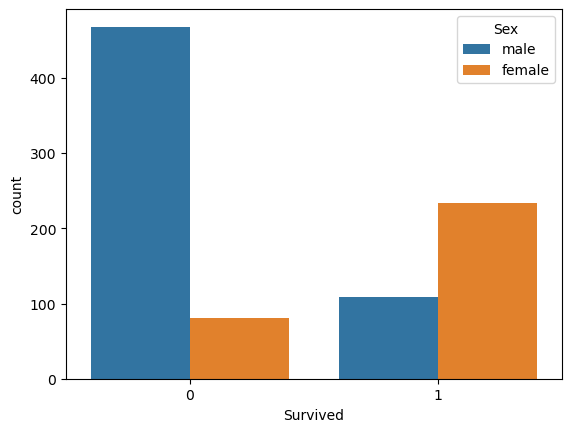

In [9]:
#visualization

sns.countplot(x="Survived", hue="Sex", data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

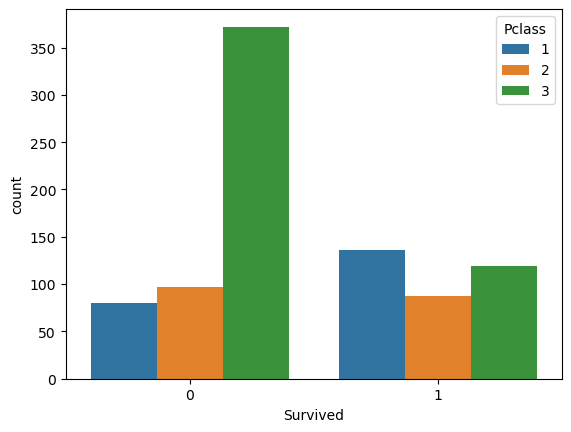

In [10]:
sns.countplot(x="Survived", hue="Pclass", data=df)

In [11]:
df.drop(["PassengerId","Name","Ticket","Fare","Cabin"],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


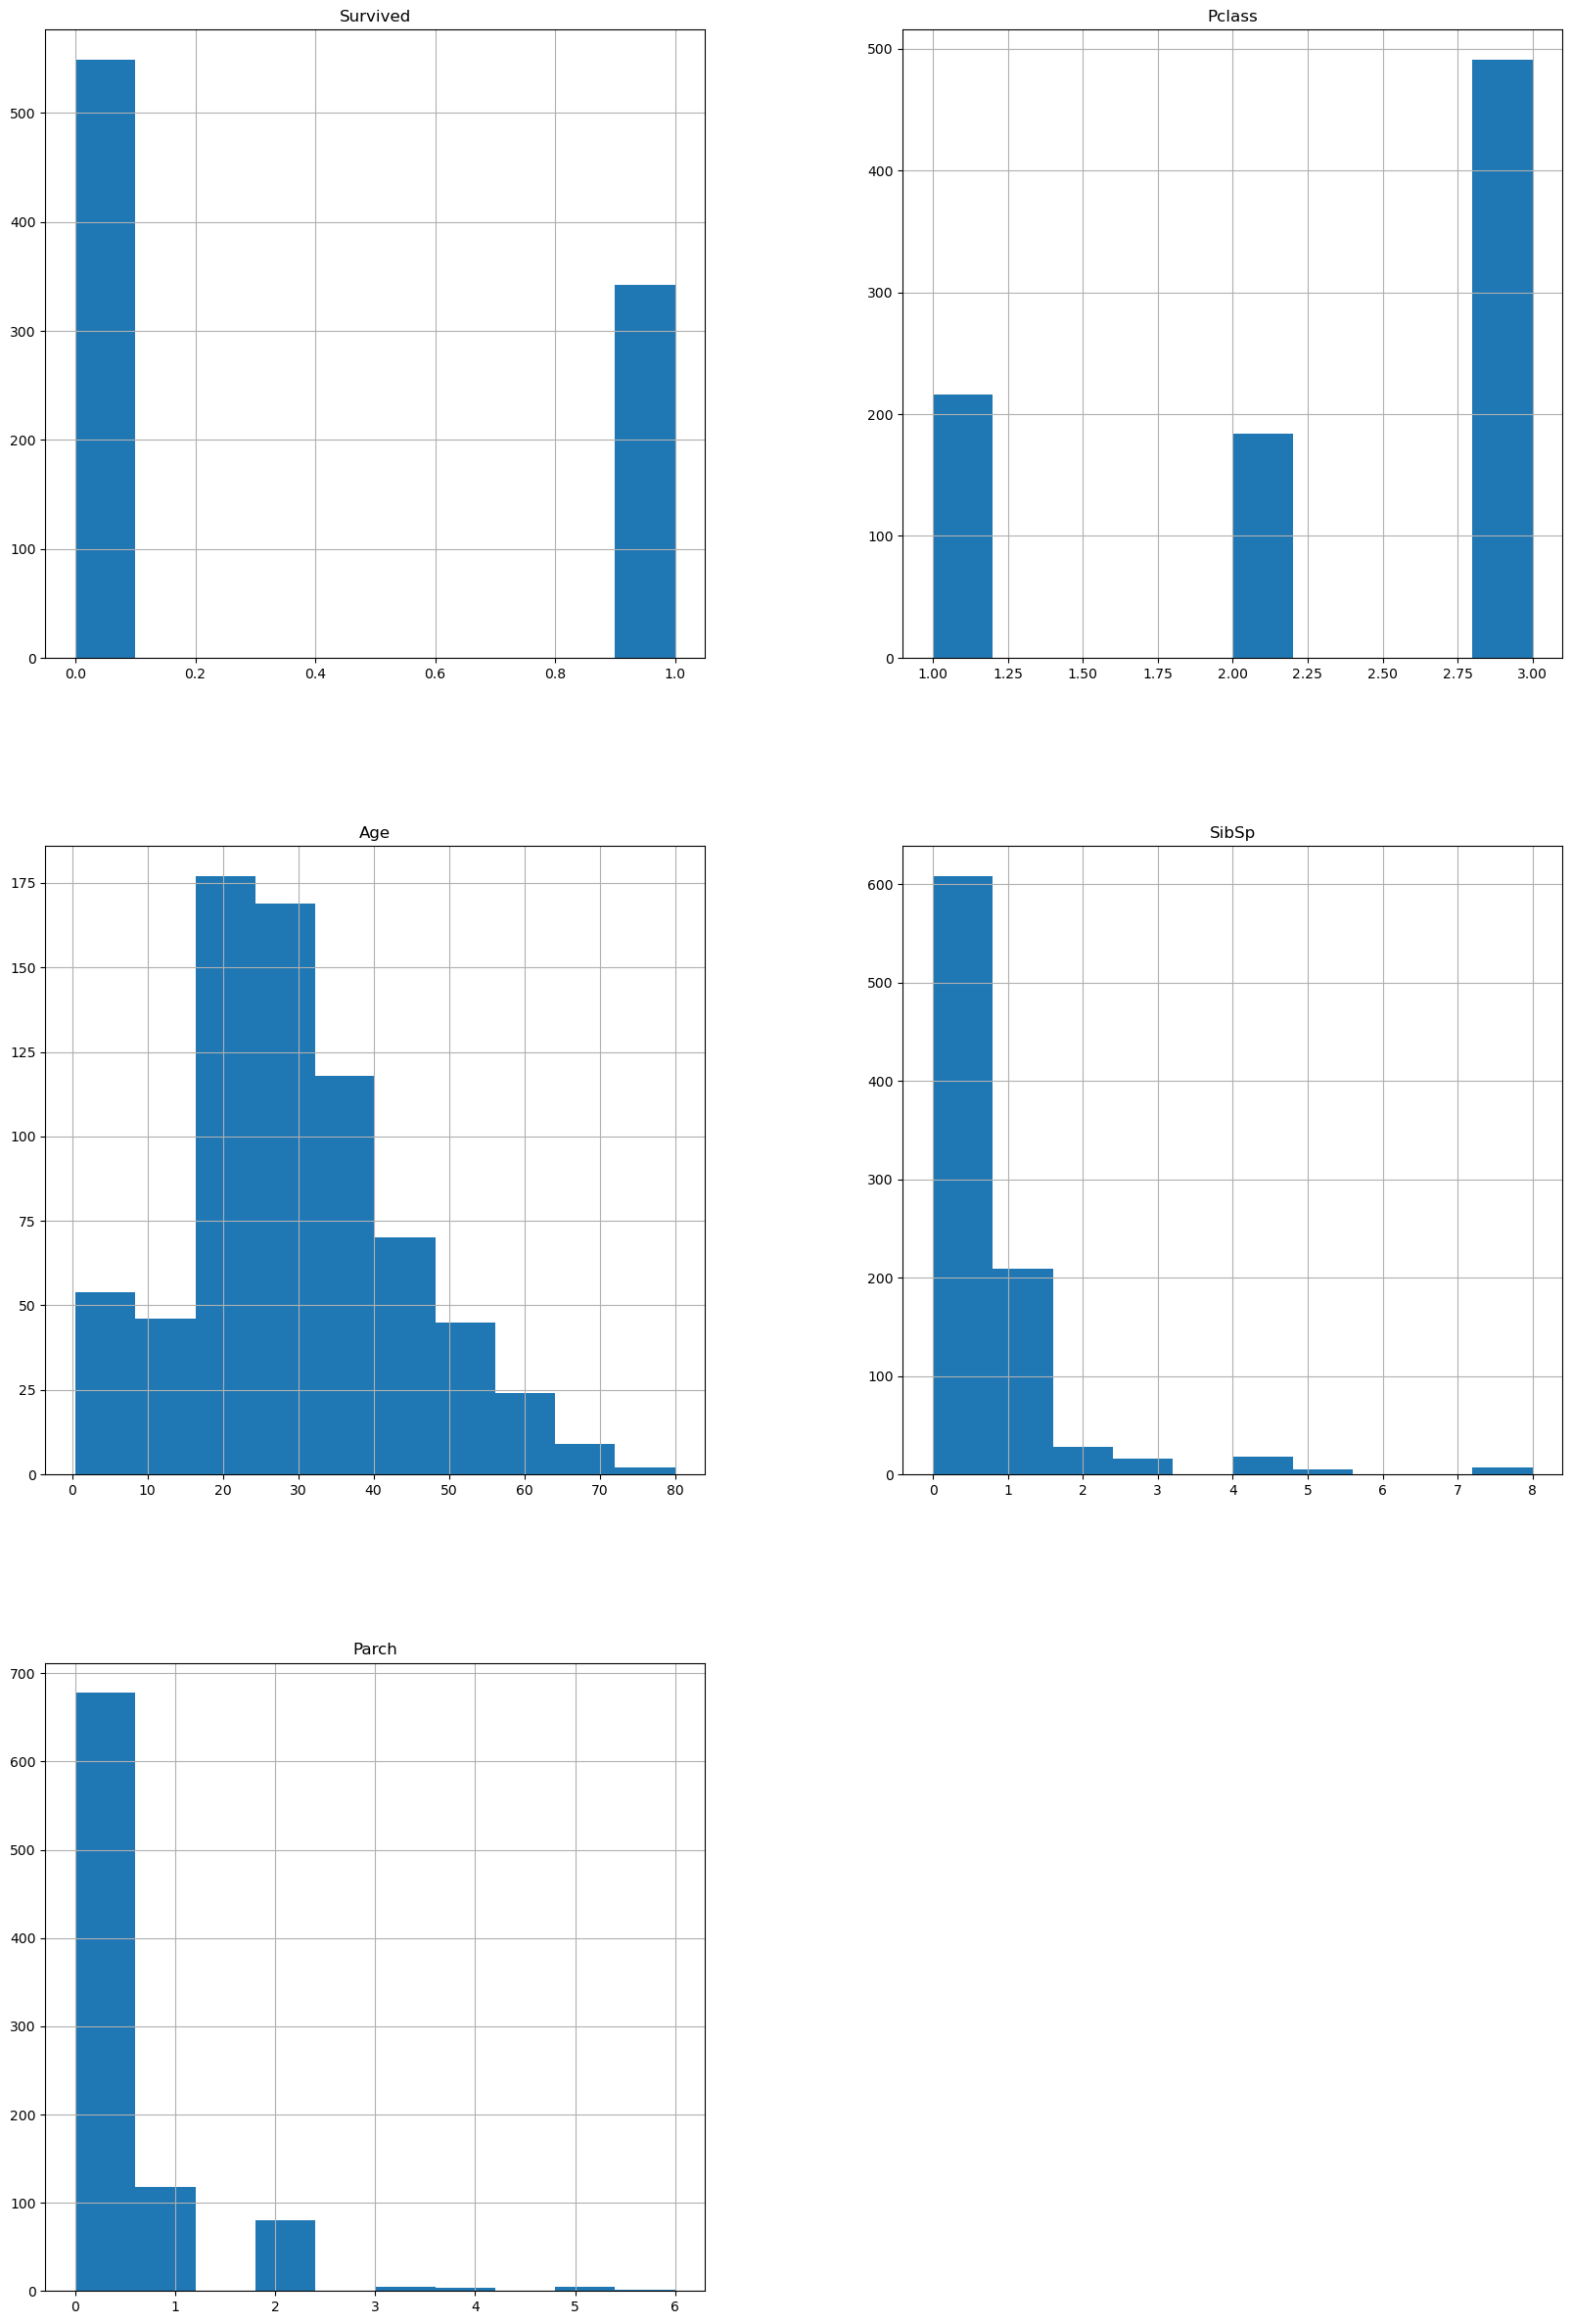

In [12]:
df.hist(figsize=(20,30))
plt.show()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

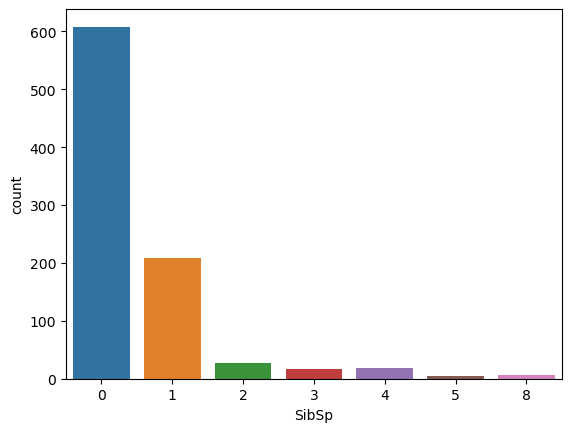

In [13]:
sns.countplot(x="SibSp",data=df)

<AxesSubplot:>

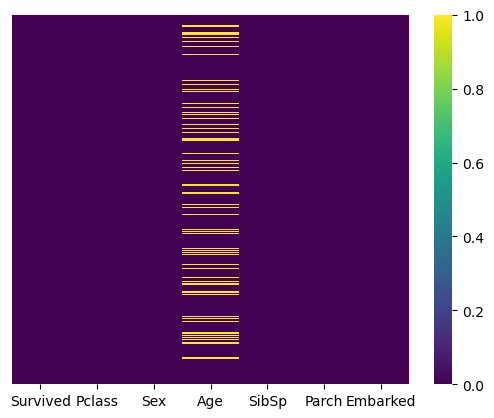

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

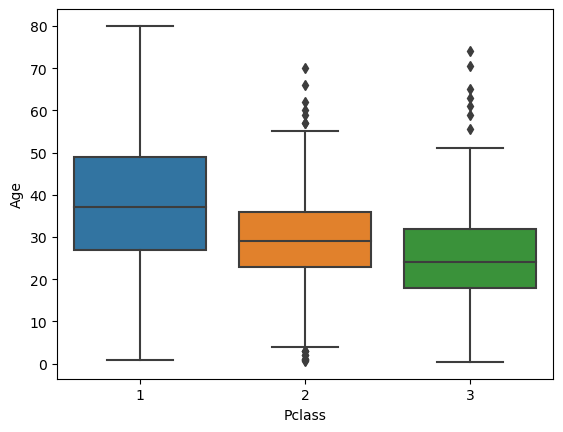

In [15]:
sns.boxplot(x="Pclass", y="Age", data=df)

In [16]:
df.dropna(inplace=True)

<AxesSubplot:>

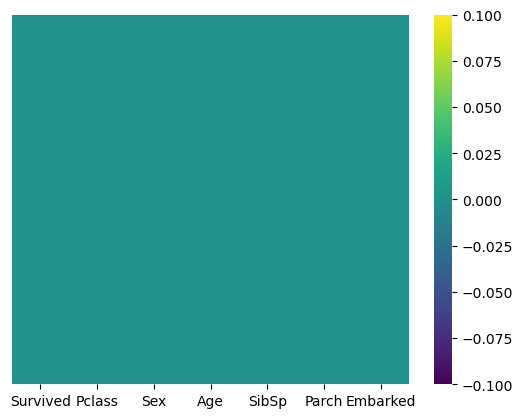

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [18]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [19]:
df=pd.get_dummies(df,columns=["Pclass","Sex","Embarked"])

In [20]:
df.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [21]:
df.dtypes

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [22]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [23]:
X = df.drop(['Survived'], axis=1)

y = df[['Survived']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Fit the model 

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
model=LogisticRegression()
model.fit(X_train, y_train)
model

LogisticRegression()

In [28]:
model.score(X_train,y_train)

0.8172690763052208

In [29]:
model.score(X_test,y_test)

0.7897196261682243

In [30]:
predictions=model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7897196261682243

In [32]:
from sklearn import metrics

In [33]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       122
           1       0.79      0.70      0.74        92

    accuracy                           0.79       214
   macro avg       0.79      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



<AxesSubplot:>

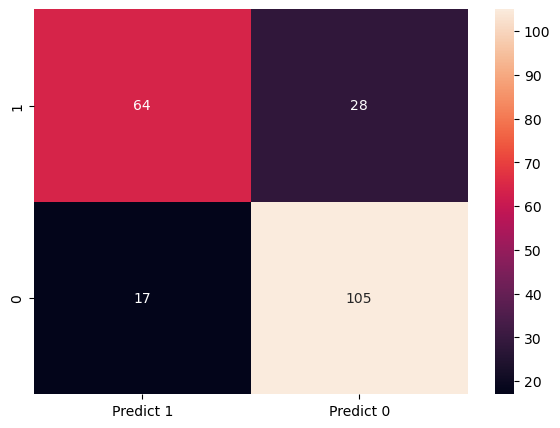

In [34]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')